In [1]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
%%capture
import matplotlib.pyplot as plt
import numpy as np

np.seterr(all="ignore")
np.random.seed(12345)
import os
from threeML import *
from threeML.io.package_data import get_path_of_data_file
from astropy.io import fits

In [3]:
# os.chdir('current/spectral_analysis')
os.chdir('current')

In [4]:
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
from threeML.io.logging import silence_console_log
silence_warnings()

set_threeML_style()

In [5]:
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams.update({
    "text.usetex": False,
    "font.family": 'Helvetica'
})

In [6]:
# gbm_catalog = FermiGBMBurstCatalog()
# gbm_catalog.query_sources("GRB150523396")

In [7]:
# grb_info = gbm_catalog.get_detector_information()["GRB150523396"]
# # grb_info will contain all the basic GRB information
# gbm_detectors = grb_info["detectors"]
# dload = download_GBM_trigger_data("bn150523396", detectors=gbm_detectors)

In [8]:
# dload

In [22]:
# List of detectors
detectors = ['n9', 'na', 'nb', 'b1']

def files_input(detectors, GRB):

    """
     Function to input files faster
    """
    
    # Create the detectors list using a loop
    detectors = [{"name": name} for name in detector_names]
    
   # Initialize a dictionary to store results
    time_series_data = {}

    for detector in detectors:
        name = detector["name"]
        
        cspec_file = f"glg_cspec_{name}_{GRB}_v00.pha"
        tte_file = f"glg_tte_{name}_{GRB}_v00.fit"
        gbm_rsp = f"glg_cspec_{name}_{GRB}_v00.rsp"

        # Create TimeSeriesBuilder objects and assign them to dynamic keys in the dictionary
        time_series_data[f"gbm_cspec_{name}"] = TimeSeriesBuilder.from_gbm_cspec_or_ctime(
            f"{name}_cspec", cspec_or_ctime_file=cspec_file, rsp_file=gbm_rsp
        )
        time_series_data[f"gbm_tte_{name}"] = TimeSeriesBuilder.from_gbm_tte(
            f"{name}_tte", tte_file=tte_file, rsp_file=gbm_rsp
        )

    return time_series_data




In [27]:
time_series_data = files_input(detectors, 'bn130715906')

# Dynamically create variables in the local scope (not recommended)
for det in detectors:
    globals()[f'gbm_cspec_{det}'] = time_series_data[f'gbm_cspec_{det}']
    globals()[f'gbm_tte_{det}'] = time_series_data[f'gbm_tte_{det}']



Loading PHAII Spectra:   0%|                           | 0/1724 [00:00<?, ?it/s]

Loading PHAII Spectra:   0%|                           | 0/1724 [00:00<?, ?it/s]

Loading PHAII Spectra:   0%|                           | 0/1724 [00:00<?, ?it/s]

Loading PHAII Spectra:   0%|                           | 0/1724 [00:00<?, ?it/s]

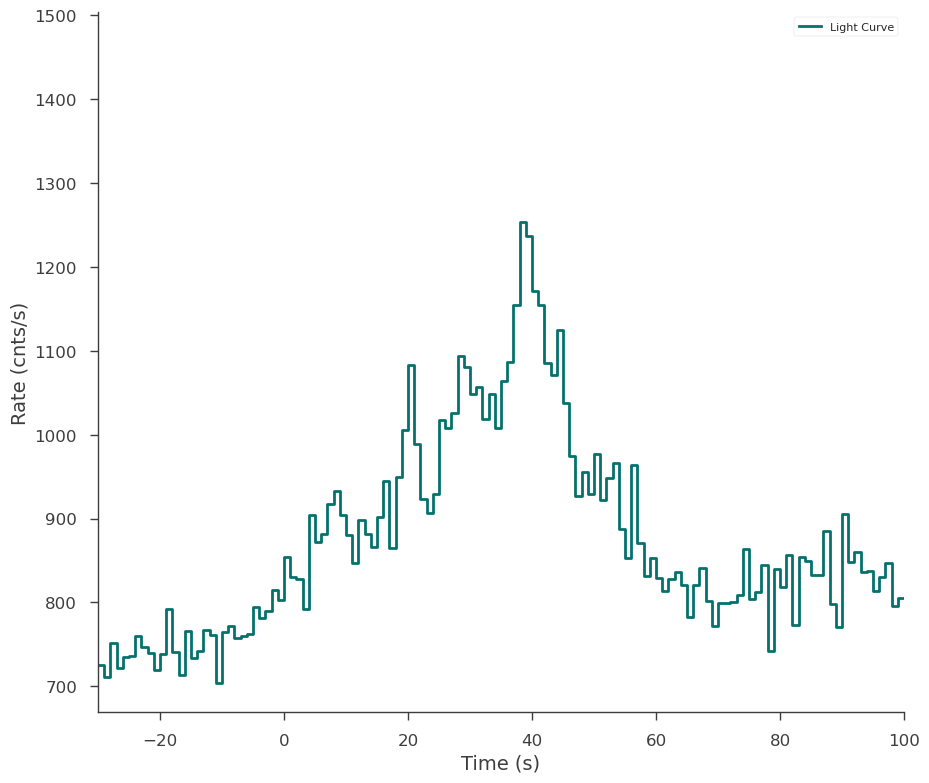

In [25]:
# Now you can use them individually
fig = gbm_tte_n9.view_lightcurve(start=-30, stop=100)


16:53:12 INFO      Interval set to -2.0-62.0 for nai9_tte                                ]8;id=938365;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=151428;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#291\291]8;;\

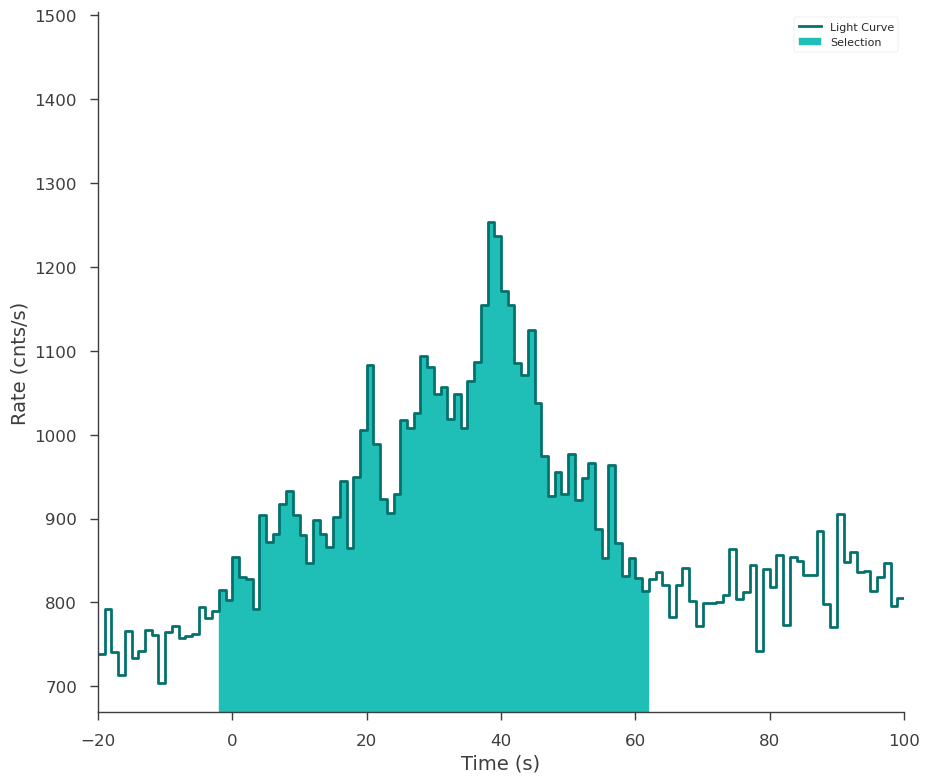

In [18]:
gbm_tte_n9.set_active_time_interval("-2.0-62.0")
fig = gbm_tte_n9.view_lightcurve(start=-20, stop=100)

16:53:13 INFO      Interval set to -2.0-62.0 for naia_tte                                ]8;id=567038;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=232858;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#291\291]8;;\

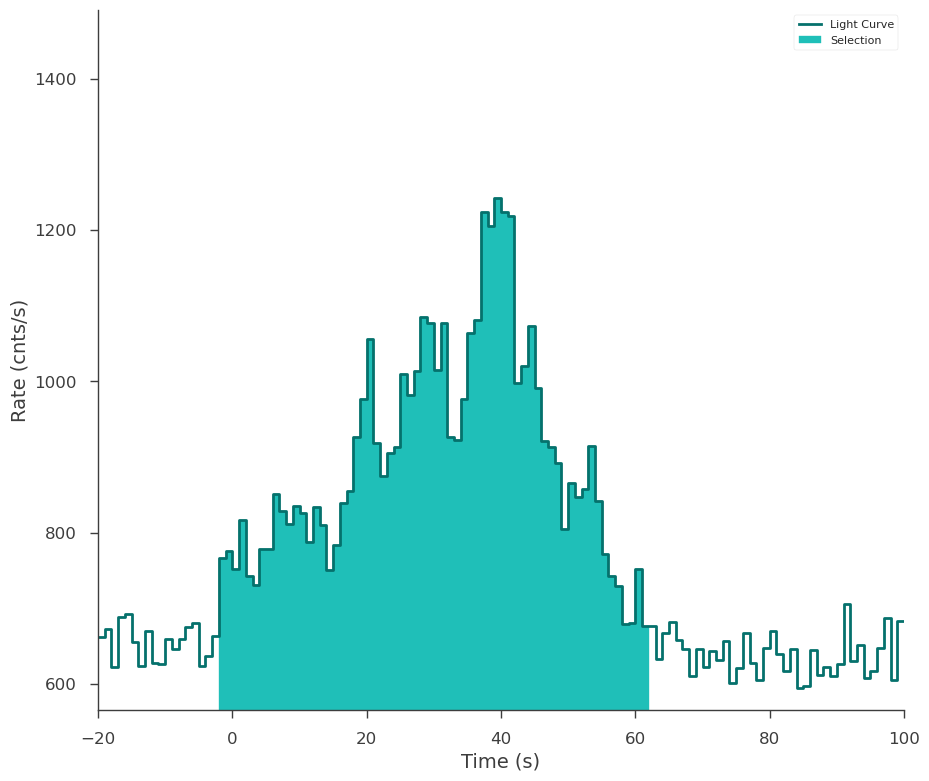

In [19]:
gbm_tte_na.set_active_time_interval("-2.0-62.0")
fig = gbm_tte_na.view_lightcurve(start=-20, stop=100)

         INFO      Interval set to -2.0-62.0 for naib_tte                                ]8;id=564706;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=769776;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#291\291]8;;\

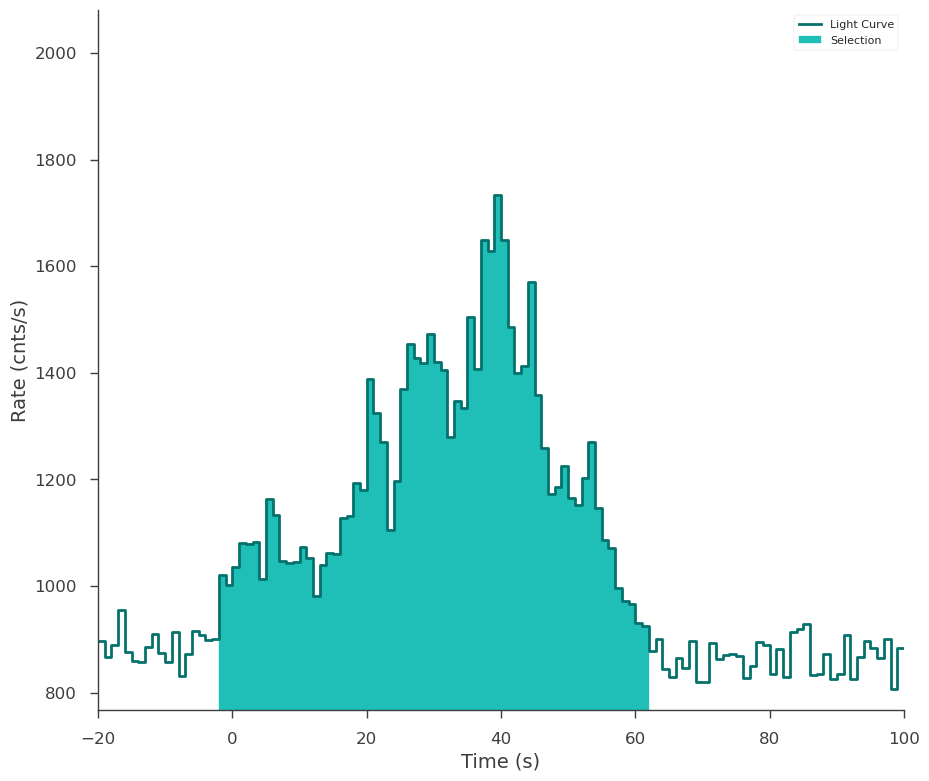

In [20]:
gbm_tte_nb.set_active_time_interval("-2.0-62.0")
fig = gbm_tte_nb.view_lightcurve(start=-20, stop=100)

16:53:14 INFO      Interval set to -2.0-62.0 for bgob1_tte                               ]8;id=597822;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=336021;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#291\291]8;;\

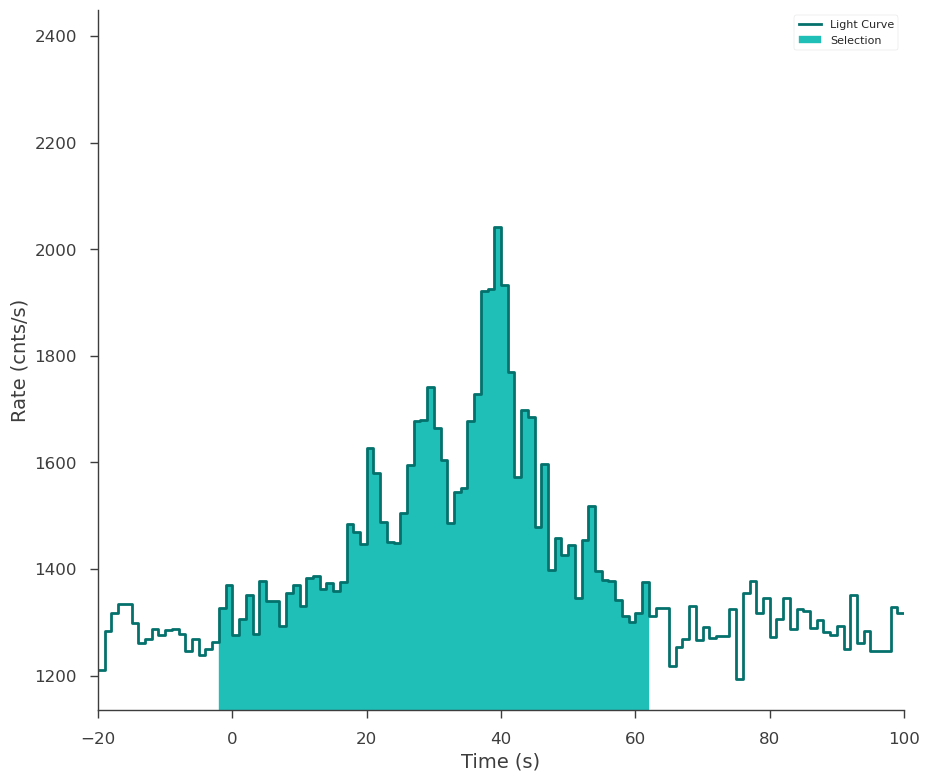

In [21]:
gbm_tte_b1.set_active_time_interval("-2.0-62.0")
fig = gbm_tte_b1.view_lightcurve(start=-20, stop=100)

Finding best polynomial Order:   0%|                      | 0/5 [00:00<?, ?it/s]

16:54:27 INFO      Auto-determined polynomial order: 1                                            ]8;id=601679;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=308696;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/event_list.py#539\539]8;;\

Fitting GBM_NAI_09 background:   0%|                    | 0/128 [00:00<?, ?it/s]

16:54:35 INFO      None 1-order polynomial fit with the mle method                               ]8;id=798564;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=986422;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

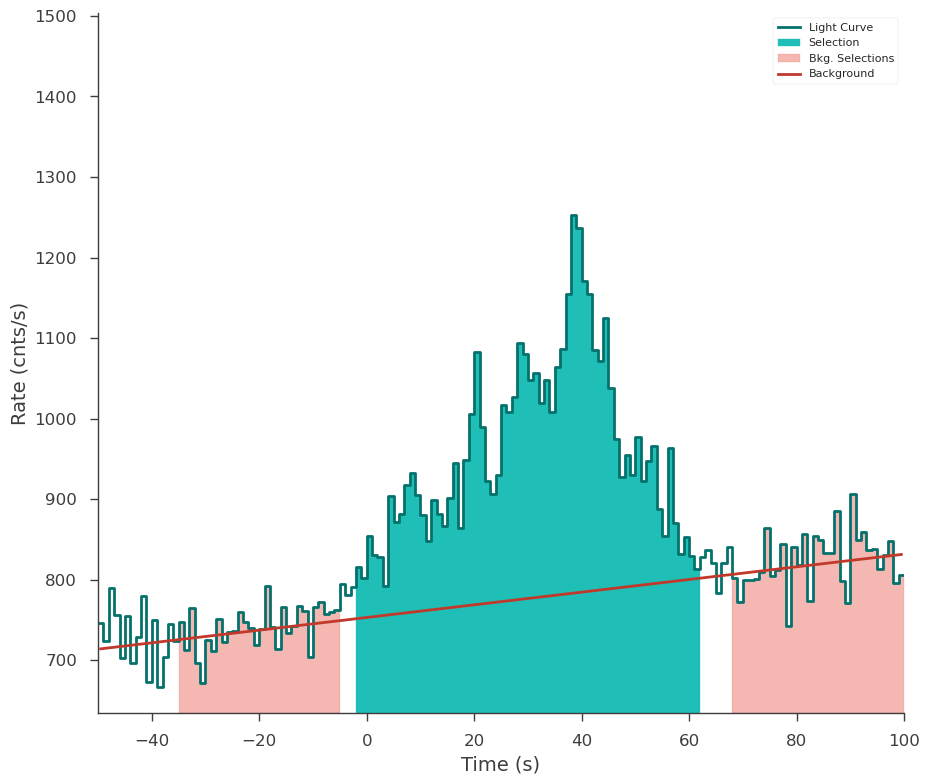

In [26]:
gbm_tte_n9.set_background_interval("-35--5", "68-108")
fig = gbm_tte_n9.view_lightcurve(start=-50, stop=100)


Finding best polynomial Order:   0%|                      | 0/5 [00:00<?, ?it/s]

16:54:36 INFO      Auto-determined polynomial order: 0                                            ]8;id=434690;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=238730;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/event_list.py#539\539]8;;\

Fitting GBM_NAI_10 background:   0%|                    | 0/128 [00:00<?, ?it/s]

16:54:43 INFO      None 0-order polynomial fit with the mle method                               ]8;id=499136;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=955103;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

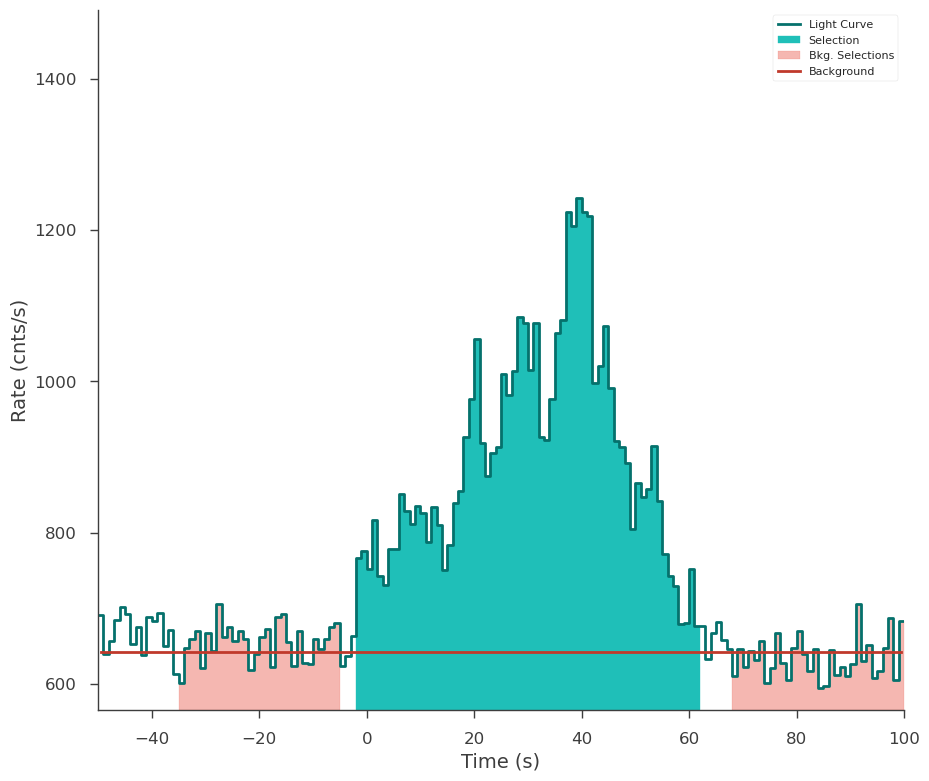

In [27]:
gbm_tte_na.set_background_interval("-35--5", "68-108")
fig = gbm_tte_na.view_lightcurve(start=-50, stop=100)


Finding best polynomial Order:   0%|                      | 0/5 [00:00<?, ?it/s]

16:54:44 INFO      Auto-determined polynomial order: 0                                            ]8;id=306615;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=860859;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/event_list.py#539\539]8;;\

Fitting GBM_NAI_11 background:   0%|                    | 0/128 [00:00<?, ?it/s]

16:54:52 INFO      None 0-order polynomial fit with the mle method                               ]8;id=114739;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=876398;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

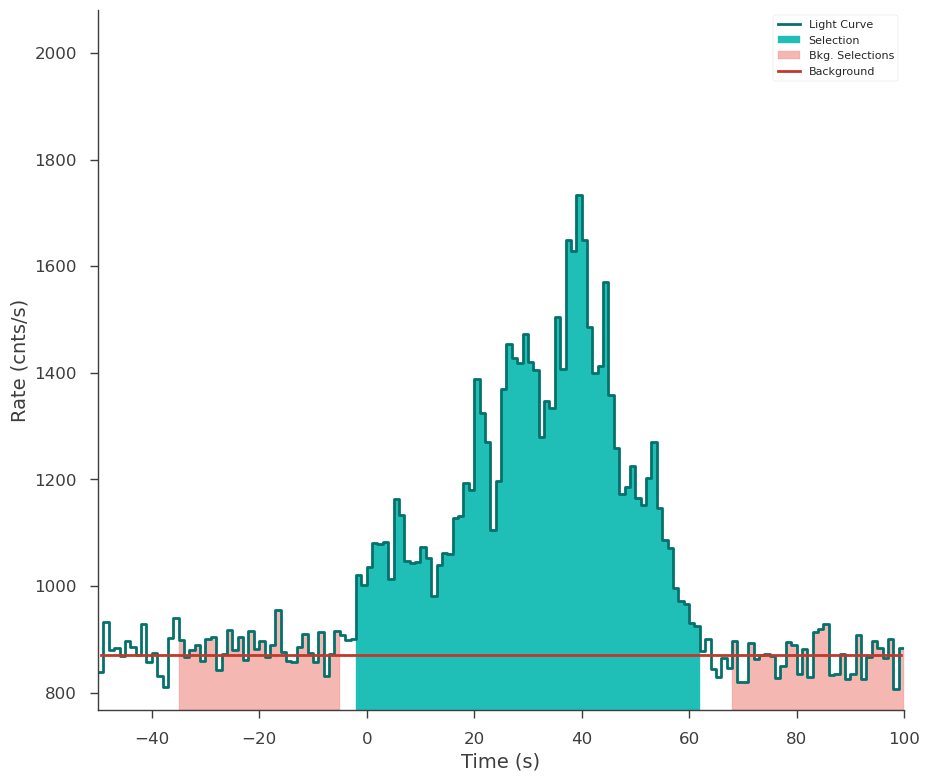

In [28]:
gbm_tte_nb.set_background_interval("-35--5", "68-108")
fig = gbm_tte_nb.view_lightcurve(start=-50, stop=100)


Finding best polynomial Order:   0%|                      | 0/5 [00:00<?, ?it/s]

16:54:53 INFO      Auto-determined polynomial order: 0                                            ]8;id=936586;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=737863;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/event_list.py#539\539]8;;\

Fitting GBM_BGO_01 background:   0%|                    | 0/128 [00:00<?, ?it/s]

16:55:00 INFO      None 0-order polynomial fit with the mle method                               ]8;id=620368;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=209792;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

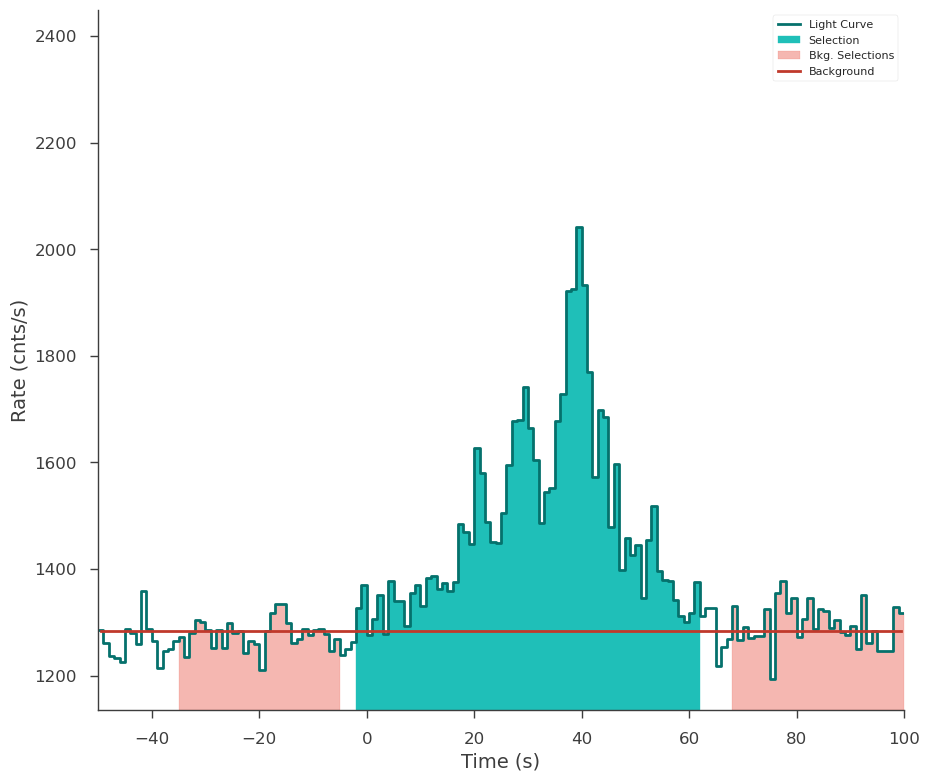

In [29]:
gbm_tte_b1.set_background_interval("-35--5", "68-108")
fig = gbm_tte_b1.view_lightcurve(start=-50, stop=100)


In [25]:
gbm_tte_na.save_background("background_store_na", overwrite=True)
gbm_tte_nb.save_background("background_store_nb", overwrite=True)
gbm_tte_n9.save_background("background_store_n9", overwrite=True)
gbm_tte_b1.save_background("background_store_b1", overwrite=True)

14:26:22 INFO      Saved fitted background to background_store_na.h5                            ]8;id=623094;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=419483;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to background_store_na                               ]8;id=397427;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=621218;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         INFO      Saved fitted background to background_store_nb.h5                            ]8;id=310032;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=754502;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to background_store_nb                               ]8;id=952777;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=961254;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         INFO      Saved fitted background to background_store_n9.h5                            ]8;id=772193;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=699355;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to background_store_n9                               ]8;id=105816;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=5075;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         INFO      Saved fitted background to background_store_b1.h5                            ]8;id=75725;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=893392;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to background_store_b1                               ]8;id=585429;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=264137;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

In [52]:
gbm_plugin_n0 = gbm_tte_n0.to_spectrumlike()

12:46:11 INFO      Auto-probed noise models:                                                    ]8;id=943117;file:///home/shubh-mittal/miniconda3/envs/threeML/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=62939;file:///home/shubh-mittal/miniconda3/envs/threeML/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=864251;file:///home/shubh-mittal/miniconda3/envs/threeML/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=16214;file:///home/shubh-mittal/miniconda3/envs/threeML/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=993438;file:///home/shubh-mittal/miniconda3/envs/threeML/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=38404;file:///home/shubh-mittal/miniconda3/envs/threeML/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

In [56]:
gbm_plugin_n0.display()

,0
n. channels,128
total rate,1170.868344
total bkg. rate,947.665155
total bkg. rate error,5.714934
bkg. exposure,26.927024
bkg. is poisson,False
exposure,26.927024
is poisson,True
background,profiled
significance,26.108875


In [59]:
# gbm_plugin_b0.display()

In [107]:
# Time Resolved

In [23]:
time_edges = np.array([-2, 62])

starts = time_edges[:-1]

stops = time_edges[1:]

gbm_tte_n9.create_time_bins(start=starts, stop=stops, method="custom")
gbm_tte_na.create_time_bins(start=starts, stop=stops, method="custom")
gbm_tte_nb.create_time_bins(start=starts, stop=stops, method="custom")
gbm_tte_b1.create_time_bins(start=starts, stop=stops, method="custom")

16:53:31 INFO      Created 1 bins via custom                                             ]8;id=879143;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=333135;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Created 1 bins via custom                                             ]8;id=477529;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=156135;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Created 1 bins via custom                                             ]8;id=268409;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=720027;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Created 1 bins via custom                                             ]8;id=738241;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=170430;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

In [ ]:
os.chdir('spectral_analysis')

In [29]:
gbm_tte_n9.write_pha_from_binner(
    file_name="int_n9_spectraFile", overwrite=True, force_rsp_write=True
)

gbm_tte_na.write_pha_from_binner(
    file_name="int_na_spectraFile", overwrite=True, force_rsp_write=True
)

gbm_tte_nb.write_pha_from_binner(
    file_name="int_nb_spectraFile", overwrite=True, force_rsp_write=True
)

gbm_tte_b1.write_pha_from_binner(
    file_name="int_b1_spectraFile", overwrite=True, force_rsp_write=True
)

Creating plugins:   0%|                                   | 0/1 [00:00<?, ?it/s]

14:28:27 INFO      Selections saved to int_n9_spectraFile                                ]8;id=120813;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=468407;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#443\443]8;;\

Creating plugins:   0%|                                   | 0/1 [00:00<?, ?it/s]

         INFO      Selections saved to int_na_spectraFile                                ]8;id=337714;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=940724;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#443\443]8;;\

Creating plugins:   0%|                                   | 0/1 [00:00<?, ?it/s]

14:28:28 INFO      Selections saved to int_nb_spectraFile                                ]8;id=754327;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=146352;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#443\443]8;;\

Creating plugins:   0%|                                   | 0/1 [00:00<?, ?it/s]

         INFO      Selections saved to int_b1_spectraFile                                ]8;id=428828;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=749448;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#443\443]8;;\

In [31]:
gbm_tte_nb.create_time_bins(start=-2, stop=62, method='bayesblocks', use_background=True)


16:55:30 INFO      Created 13 bins via bayesblocks                                       ]8;id=416082;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=616709;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

In [32]:
gbm_tte_nb.bins.display()

,Start,Stop,Duration,Midpoint
0,-1.998412,16.607824,18.606236,7.304706
1,16.607824,19.788802,3.180978,18.198313
2,19.788802,22.839811,3.051009,21.314306
3,22.839811,25.136021,2.296210,23.987916
4,25.136021,37.030194,11.894173,31.083108
5,37.030194,41.452476,4.422282,39.241335
6,41.452476,44.152343,2.699867,42.802409
7,44.152343,45.048313,0.895970,44.600328
8,45.048313,47.117830,2.069517,46.083072
9,47.117830,55.524352,8.406522,51.321091


In [33]:
gbm_tte_nb.bins.starts

[-1.9984119534492493,
 16.607823967933655,
 19.788801968097687,
 22.839810967445374,
 25.136020988225937,
 37.03019404411316,
 41.45247599482536,
 44.15234297513962,
 45.04831302165985,
 47.117829978466034,
 55.52435204386711,
 58.26026996970177,
 58.26243698596954]

In [40]:
time_edges = [-1.9984119534492493,
 16.607823967933655,
 19.788801968097687,
 22.839810967445374,
 25.136020988225937,
 37.03019404411316,
 41.45247599482536,
 47.117829978466034,
 55.52435204386711,
 58.26026996970177,
 61.999154]


starts = time_edges[:-1]

stops = time_edges[1:]

gbm_tte_n9.create_time_bins(start=starts, stop=stops, method="custom")
gbm_tte_na.create_time_bins(start=starts, stop=stops, method="custom")
gbm_tte_nb.create_time_bins(start=starts, stop=stops, method="custom")
gbm_tte_b1.create_time_bins(start=starts, stop=stops, method="custom")

16:57:44 INFO      Created 10 bins via custom                                            ]8;id=985507;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=469553;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Created 10 bins via custom                                            ]8;id=179449;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=736189;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Created 10 bins via custom                                            ]8;id=28389;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=258449;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Created 10 bins via custom                                            ]8;id=171268;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=40125;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

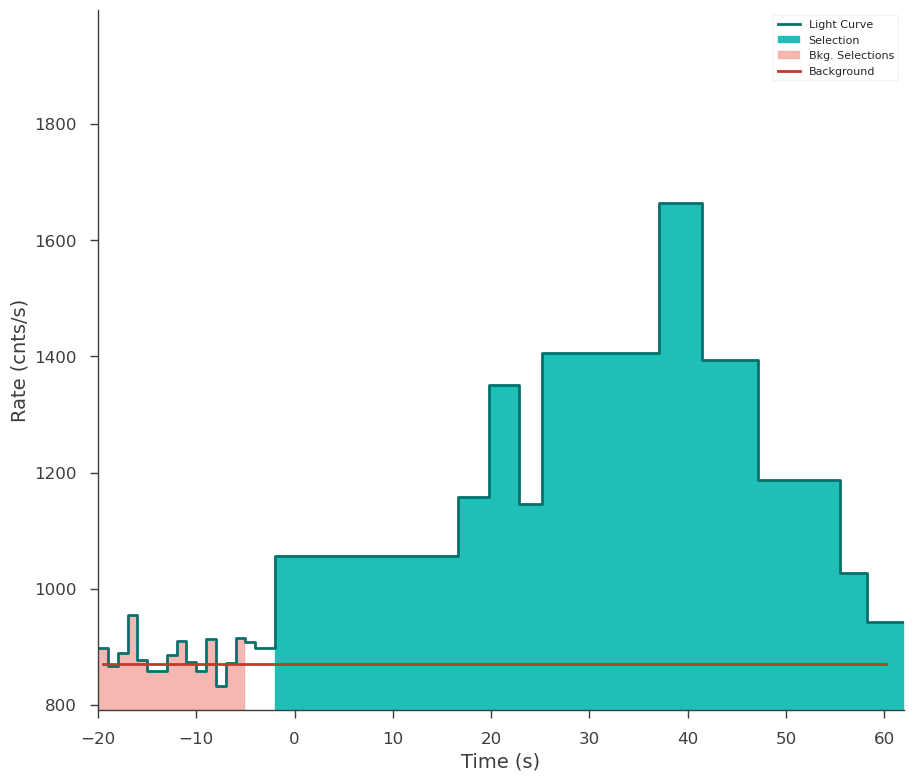

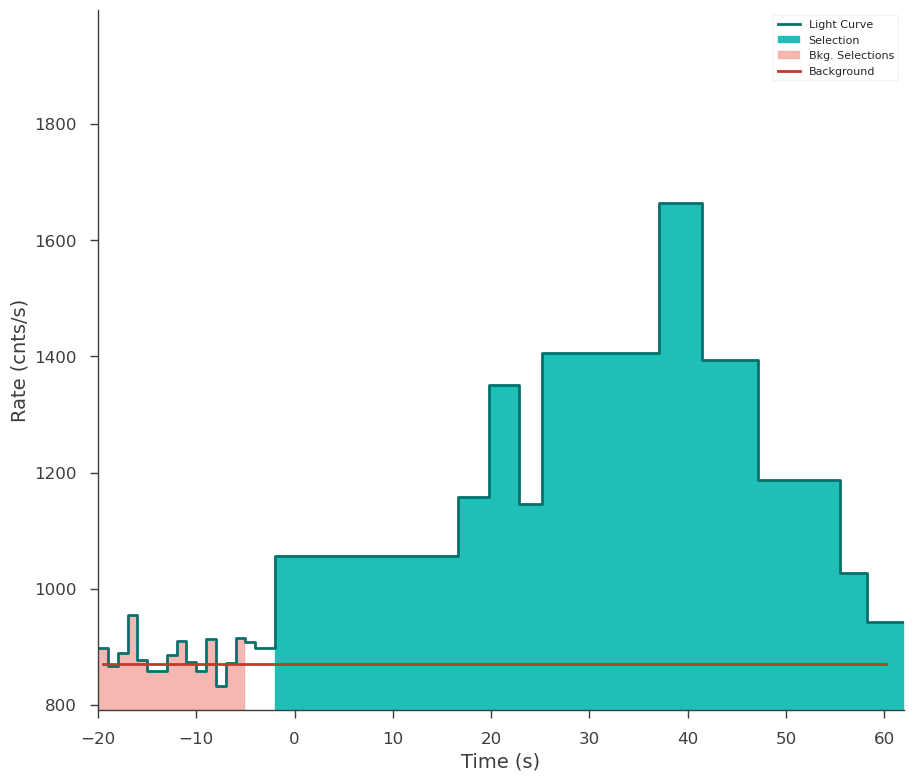

In [41]:
gbm_tte_nb.view_lightcurve(start=-20, stop=30, use_binner=True)

In [47]:
gbm_tte_n9.write_pha_from_binner(
    file_name="TR_n9_spectraFile", overwrite=True, force_rsp_write=True
)

gbm_tte_na.write_pha_from_binner(
    file_name="TR_na_spectraFile", overwrite=True, force_rsp_write=True
)

gbm_tte_nb.write_pha_from_binner(
    file_name="TR_nb_spectraFile", overwrite=True, force_rsp_write=True
)

gbm_tte_b1.write_pha_from_binner(
    file_name="TR_b1_spectraFile", overwrite=True, force_rsp_write=True
)

Creating plugins:   0%|                                  | 0/10 [00:00<?, ?it/s]

16:58:54 INFO      Selections saved to TR_n9_spectraFile                                 ]8;id=222899;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=139738;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#443\443]8;;\

Creating plugins:   0%|                                  | 0/10 [00:00<?, ?it/s]

16:58:55 INFO      Selections saved to TR_na_spectraFile                                 ]8;id=887617;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=341981;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#443\443]8;;\

Creating plugins:   0%|                                  | 0/10 [00:00<?, ?it/s]

16:58:56 INFO      Selections saved to TR_nb_spectraFile                                 ]8;id=226725;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=886350;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#443\443]8;;\

Creating plugins:   0%|                                  | 0/10 [00:00<?, ?it/s]

16:58:58 INFO      Selections saved to TR_b1_spectraFile                                 ]8;id=856107;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=100732;file:///opt/Miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#443\443]8;;\